In [1]:
!pip install -q tensorflow-recommenders

     |████████████████████████████████| 89 kB 2.2 MB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
import os
import pprint
import tempfile

from typing import Dict, Text

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs
import pandas as pd
import sys
from datetime import datetime

In [4]:
if 'google.colab' in str(get_ipython()):

  # To run in Gogogle Colab

  #@title Mount your Google Drive

  %matplotlib inline
  %load_ext autoreload
  %autoreload 2

  from google.colab import drive
  #drive.mount('/content/gdrive')
  drive.mount("/content/gdrive", force_remount=True)

  folder = "/content/drive/MyDrive/585_project" #@param {type:"string"}
  !ln -Ts $folder /content/IFT6759 2> /dev/null

  # Add the assignment folder to Python path
  if '/content/COMP585' not in sys.path:
      sys.path.insert(0, '/content/COMP585')

Mounted at /content/gdrive


In [39]:
users = pd.read_csv('/content/gdrive/MyDrive/585_project/user_data.csv', sep=';')

In [6]:
users['gender'].value_counts()

M    829960
F    170040
Name: gender, dtype: int64

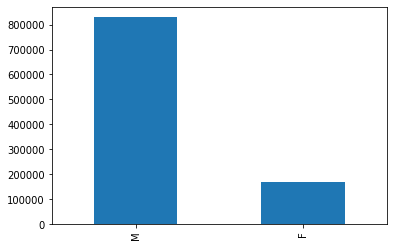

In [7]:
users['gender'].value_counts().plot(kind='bar')

In [8]:
users['gender'].value_counts(normalize=True)

M    0.82996
F    0.17004
Name: gender, dtype: float64

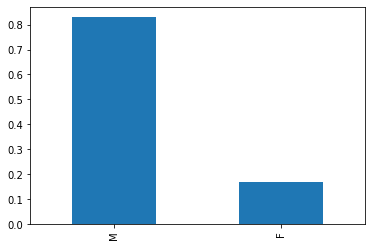

In [9]:
users['gender'].value_counts(normalize=True).plot(kind='bar')

In [11]:
candidates = pd.read_csv('/content/gdrive/MyDrive/585_project/candidates.csv', sep=',')

In [12]:
candidates

,Unnamed: 0,movieID,length_binned,year_binned,vote_average,popularity,original_language,Comedy,Mystery,Crime,...,Adventure,War,Horror,Western,Fantasy,Family,History,TV Movie,Music,Foreign
0,5,+nous+la+libert+1931,2.0,1,7.4,1.209032,fr,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,...and+god+created+woman+1956,2.0,1,6.2,3.282390,fr,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,...and+justice+for+all+1979,2.0,2,7.1,6.291512,en,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,10+items+or+less+2006,1.0,3,6.6,3.898236,en,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,10+rillington+place+1971,2.0,2,6.9,2.999880,en,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,25495,zorba+the+greek+1964,3.0,1,7.0,4.813635,el,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10100,25497,zorro+1975,3.0,2,7.0,2.823599,fr,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10101,25501,zu+warriors+from+the+magic+mountain+1983,2.0,2,6.6,1.401607,cn,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10102,25502,zulu+1964,3.0,1,7.4,11.604242,en,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
list1 = candidates.columns.values.tolist()

In [22]:
list2 = list1[7:]
list2

['Comedy',
 'Mystery',
 'Crime',
 'Drama',
 'Romance',
 'Documentary',
 'Thriller',
 'Action',
 'Animation',
 'Science Fiction',
 'Adventure',
 'War',
 'Horror',
 'Western',
 'Fantasy',
 'Family',
 'History',
 'TV Movie',
 'Music',
 'Foreign']

In [49]:
for i in list2:
  print(i, ":" ,round(candidates[i].value_counts()[1]/10105,2))

Comedy : 0.3
Mystery : 0.07
Crime : 0.15
Drama : 0.6
Romance : 0.19
Documentary : 0.06
Thriller : 0.19
Action : 0.17
Animation : 0.06
Science Fiction : 0.07
Adventure : 0.1
War : 0.04
Horror : 0.07
Western : 0.02
Fantasy : 0.06
Family : 0.07
History : 0.05
TV Movie : 0.01
Music : 0.04
Foreign : 0.02


In [29]:
j = []
for i in list2:
  j.append(candidates[i].value_counts()[1])

In [30]:
j

[3041,
 723,
 1472,
 6064,
 1915,
 602,
 1959,
 1686,
 581,
 688,
 1025,
 444,
 752,
 246,
 646,
 676,
 537,
 73,
 441,
 194]

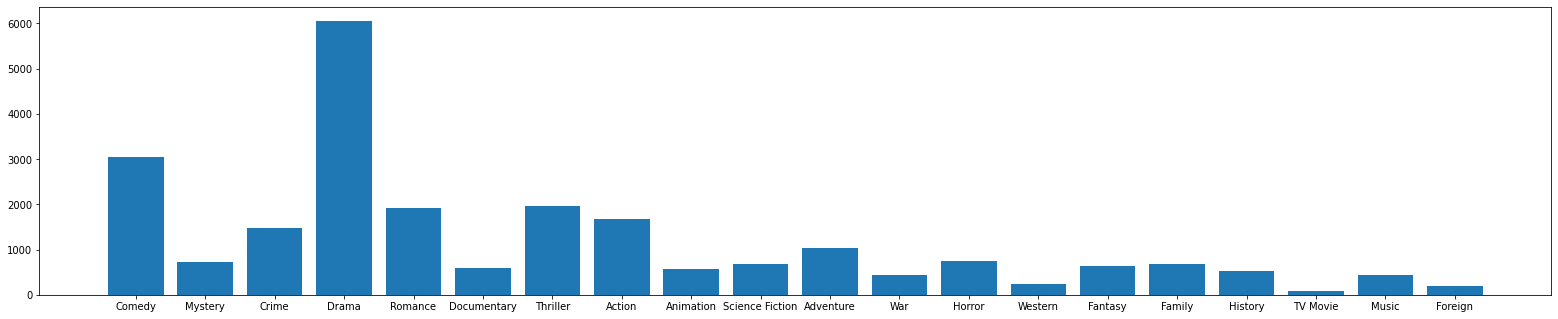

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,3.5,1])
ax.bar(list2,j)
plt.show()

In [41]:
movies = pd.read_csv('/content/gdrive/MyDrive/585_project/data_movie.csv', sep=',')

In [42]:
movies = movies[['movieID','genres','length']]

In [43]:
movies['genres'] = movies.apply(lambda row : eval(row['genres']), axis = 1)

In [44]:
movies['genres'] = movies['genres'].apply(lambda row : [d['name'] for d in row if 'id' in d])

In [46]:
movies = pd.concat([
        movies.drop("genres", 1),
        movies.genres.apply(lambda x: pd.Series(1, x)).fillna(0)
    ], axis=1)

<ipython-input-46-033b6a001634>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  movies.drop("genres", 1),


In [47]:
movies

,movieID,length,Comedy,Mystery,Crime,Drama,Romance,Documentary,Thriller,Action,...,Adventure,War,Horror,Western,Fantasy,Family,History,TV Movie,Music,Foreign
0,++++++1959,98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,++++2013,90,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,+la+mode+1993,82,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,+laventure+2008,104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,+nos+amours+1983,102,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25502,zulu+1964,138,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25503,zulu+2013,110,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25504,zulu+dawn+1979,117,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25505,zus++zo+2001,106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
for i in list2:
  print(i, ":" ,round(movies[i].value_counts()[1]/25508,2))

Comedy : 0.3
Mystery : 0.06
Crime : 0.11
Drama : 0.5
Romance : 0.17
Documentary : 0.08
Thriller : 0.18
Action : 0.15
Animation : 0.04
Science Fiction : 0.07
Adventure : 0.09
War : 0.04
Horror : 0.1
Western : 0.03
Fantasy : 0.05
Family : 0.06
History : 0.04
TV Movie : 0.01
Music : 0.04
Foreign : 0.04


In [53]:
d = []
for i in list2:
  d.append(movies[i].value_counts()[1])

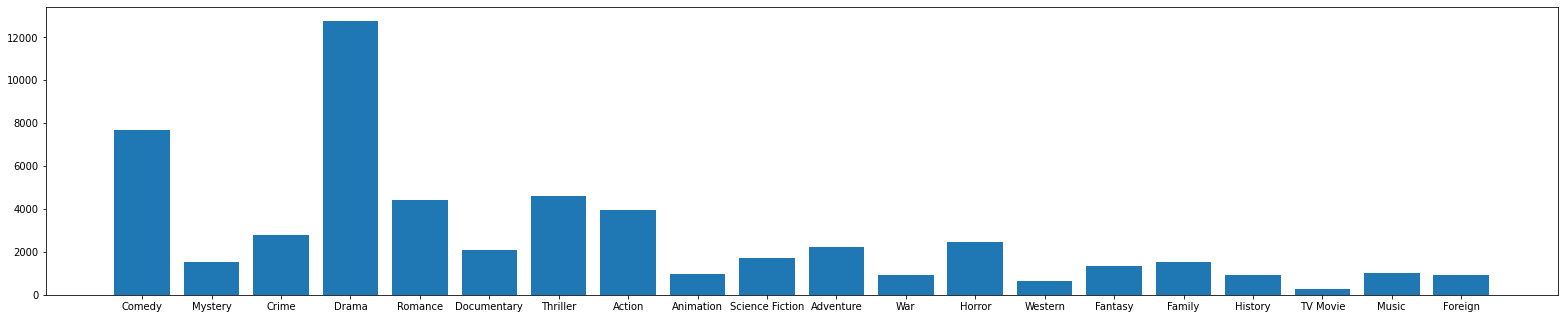

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,3.5,1])
ax.bar(list2,d)
plt.show()